<a href="https://colab.research.google.com/github/Natassiam/machineLearning/blob/transfer_learning/graphics_master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pip install orange3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 27.2 MB 1.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 121 kB 58.5 MB/s 
     |████████████████████████████████| 230 kB 69.4 MB/s 
     |████████████████████████████████| 8.4 MB 51.1 MB/s 
     |████████████████████████████████| 84 kB 4.0 MB/s 
     |████████████████████████████████| 2.5 MB 64.3 MB/s 
     |████████████████████████████████| 497 kB 70.8 MB/s 
     |████████████████████████████████| 251 kB 72.8 MB/s 
  Using cached Pygments-2.13.0-py3-none-any.whl (1.1 MB)
     |████████████████████████████████| 355 kB 74.5 MB/s 
     |████████████████████████████████| 96 kB 7.0 MB/s 
     |████████████████████████████████| 56 kB 5.7 MB/s 
     |████████████████████████████████| 149 kB 70.4 MB/s 
     |██████████████████████

In [4]:
from IPython.core import interactiveshell


In [5]:
from scipy.stats import wilcoxon,friedmanchisquare,rankdata
import Orange
from Orange.evaluation import compute_CD, graph_ranks

In [6]:
d = {'classification_Acuracy': ['g0', 'g1', 'g2', 'g3', 'g4'], 
     'k-NN': [96.2314,	87.7565,	88.6977,	95.5641,	92.3879],
     'AD': [98.6855,97.8973,99.4419,96.4328,98.0508],
     'MLP': [86.4481,72.6716,71.0698,92.3135,80.2454],
     'Naive Bayes':[89.1433,56.6156,67.6977,87.9028,89.1856],
     'SVM': [77.2432,71.543,69.7907,86.219,74.9839],
     'Boosting':[99.3471,94.5554,99.4186,98.9271,98.3614],
     'Bagging':[99.3051,98.1487,99,99.1065,98.5727],
     'RF': [99.4142,98.3566,99.3721,99.1296,98.6052]
    }

graphic = pd.DataFrame(data=d)

In [7]:
graphic

,dataset_Acuracy,k-NN,AD,MLP,Naive Bayes,SVM,Boosting,Bagging,RF
0,g0,96.2314,98.6855,86.4481,89.1433,77.2432,99.3471,99.3051,99.4142
1,g1,87.7565,97.8973,72.6716,56.6156,71.5430,94.5554,98.1487,98.3566
2,g2,88.6977,99.4419,71.0698,67.6977,69.7907,99.4186,99.0000,99.3721
3,g3,95.5641,96.4328,92.3135,87.9028,86.2190,98.9271,99.1065,99.1296
4,g4,92.3879,98.0508,80.2454,89.1856,74.9839,98.3614,98.5727,98.6052


In [8]:
algorithms_names=graphic.drop('dataset_Acuracy',axis=1).columns
performances_array = graphic[algorithms_names].values
friedmanchisquare(*performances_array)

FriedmanchisquareResult(statistic=15.400000000000006, pvalue=0.003939596491115125)

In [9]:
ranks = np.array([rankdata(-p) for p in performances_array])
average_ranks = np.mean(ranks,axis=0)

print('\n'.join('{} average rank: {}'.format(a, r) for a,r in zip(algorithms_names, average_ranks)))

k-NN average rank: 5.0
AD average rank: 3.2
MLP average rank: 6.4
Naive Bayes average rank: 7.0
SVM average rank: 7.6
Boosting average rank: 2.8
Bagging average rank: 2.6
RF average rank: 1.4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: OrangeDeprecationWarning: compute_CD is deprecated and will be removed in Orange 3.34.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: OrangeDeprecationWarning: graph_ranks is deprecated and will be removed in Orange 3.34.
  # This is added back by InteractiveShellApp.init_path()


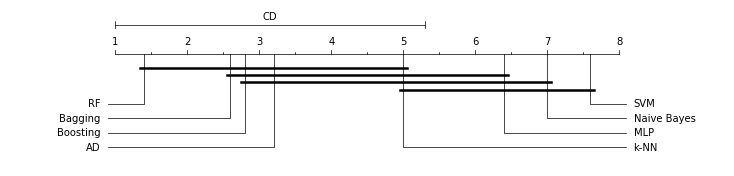

In [10]:
cd= compute_CD(average_ranks,
    n=len(graphic),
    alpha='0.1',
    test='nemenyi')

graph_ranks(average_ranks,
            names=algorithms_names,
            cd=cd,
            width=10,
            textspace=1.5,
            reverse=False)

plt.show()

In [11]:
average_ranks

array([5. , 3.2, 6.4, 7. , 7.6, 2.8, 2.6, 1.4])

In [26]:
base0 = {'Transfer_Learning_base0_Acuracy': ['g0', 'g1', 'g2', 'g3', 'g4'], 
     'IBK': [84.248, 80.647, 75.591,79.993,88.323],
     'J48': [98.165,98.805,97.418,94.395,98.301],
     'MLP': [61.085,60.737,	68.245,	71.164,	82.830],
     'NB':[86.91, 58.697,	54.500,	90.938,	88.082],
     'SMO': [70.08, 56.837,	68.185,	65.485,	71.899],
     'Bagging':[98.987, 98.011,	97.690,	98.670,	98.430],
     'RF': [98.927, 98.578,	96.166,	98.867,	98.358],
     'Boosting':[98.287, 99.028,	97.404,	95.017,	98.208]
    }

graphic = pd.DataFrame(data=base0)


In [28]:
algorithms_names=graphic.drop('Transfer_Learning_base0_Acuracy',axis=1).columns
performances_array = graphic[algorithms_names].values
friedmanchisquare(*performances_array)

FriedmanchisquareResult(statistic=9.5, pvalue=0.04974724741794365)

In [29]:
ranks = np.array([rankdata(-p) for p in performances_array])
average_ranks = np.mean(ranks,axis=0)

print('\n'.join('{} average rank: {}'.format(a, r) for a,r in zip(algorithms_names, average_ranks)))

IBK average rank: 5.4
J48 average rank: 3.0
MLP average rank: 6.8
NB average rank: 6.2
SMO average rank: 7.6
Bagging average rank: 1.8
RF average rank: 2.4
Boosting average rank: 2.8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: OrangeDeprecationWarning: compute_CD is deprecated and will be removed in Orange 3.34.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: OrangeDeprecationWarning: graph_ranks is deprecated and will be removed in Orange 3.34.
  # This is added back by InteractiveShellApp.init_path()


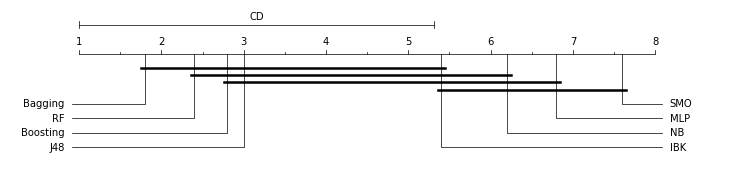

In [34]:
cd= compute_CD(average_ranks,
    n=len(graphic),
    alpha='0.1',
    test='nemenyi')

graph_ranks(average_ranks,
            names=algorithms_names,
            cd=cd,
            width=10,
            textspace=1.0,
            reverse=False)

plt.show()